import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Datasset Description

- id number
- age in days
- age in years
- gender (1 - women, 2 - men)
- height cm
- weight kg
- ap_hi (Systolic blood pressure)
- ap_lo (Diastolic blood pressure)
- cholesterol (1: normal, 2: above normal, 3: well above normal)
- gluc (1: normal, 2: above normal, 3: well above normal)
- smoke (whether patient smokes or not(0 = no, 1 = yes))
- alco Binary feature (0 = no, 1 = yes)
- active Binary feature (0 = passive life, 1 = active life)
- cardio Target variable(0 = no, 1 = yes)

In [100]:
# import libraries for data preprocessinhg
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# libraries for model fitting
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# librarie for metrics 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,cohen_kappa_score,roc_curve #f1 is harmonic mean of precision amd recall
from sklearn.metrics import confusion_matrix, classification_report


In [101]:
df=pd.read_csv("capstone_data (1).csv")
df.shape

(70000, 15)

In [102]:
df.head()

,Unnamed: 0,id,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,50.391781,2,168,62.0,110,80,normal,normal,no,no,active,0
1,1,1,20228,55.419178,1,156,85.0,140,90,well above normal,normal,no,no,active,1
2,2,2,18857,51.663014,1,165,64.0,130,70,well above normal,normal,no,no,passive,1
3,3,3,17623,48.282192,2,169,82.0,150,100,normal,normal,no,no,active,1
4,4,4,17474,47.873973,1,156,56.0,100,60,normal,normal,no,no,passive,0


In [103]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,70000.0,34999.500000,20207.403759,0.000000,17499.750000,34999.500000,52499.250000,69999.000000
id,70000.0,49972.419900,28851.302323,0.000000,25006.750000,50001.500000,74889.250000,99999.000000
age_days,70000.0,19468.865814,2467.251667,10798.000000,17664.000000,19703.000000,21327.000000,23713.000000
age_year,70000.0,53.339358,6.759594,29.583562,48.394521,53.980822,58.430137,64.967123
gender,70000.0,1.349571,0.476838,1.000000,1.000000,1.000000,2.000000,2.000000
height,70000.0,164.359229,8.210126,55.000000,159.000000,165.000000,170.000000,250.000000
weight,70000.0,74.205690,14.395757,10.000000,65.000000,72.000000,82.000000,200.000000
ap_hi,70000.0,128.817286,154.011419,-150.000000,120.000000,120.000000,140.000000,16020.000000
ap_lo,70000.0,96.630414,188.472530,-70.000000,80.000000,80.000000,90.000000,11000.000000
cardio,70000.0,0.499700,0.500003,0.000000,0.000000,0.000000,1.000000,1.000000


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age_days     70000 non-null  int64  
 3   age_year     70000 non-null  float64
 4   gender       70000 non-null  int64  
 5   height       70000 non-null  int64  
 6   weight       70000 non-null  float64
 7   ap_hi        70000 non-null  int64  
 8   ap_lo        70000 non-null  int64  
 9   cholesterol  70000 non-null  object 
 10  gluc         70000 non-null  object 
 11  smoke        70000 non-null  object 
 12  alco         70000 non-null  object 
 13  active       70000 non-null  object 
 14  cardio       70000 non-null  int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 8.0+ MB


In [105]:
df.isnull().sum()

Unnamed: 0     0
id             0
age_days       0
age_year       0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [106]:
#Dropping unnecessary columns
df.drop("Unnamed: 0",axis = 1,inplace=True)
df.drop("id",axis = 1,inplace = True)
df.drop("age_days",axis = 1,inplace = True)

In [107]:
df["bmi"]=df.weight/(df.height/100)**2
df["bmi"].head()

0    21.967120
1    34.927679
2    23.507805
3    28.710479
4    23.011177
Name: bmi, dtype: float64

In [108]:
df.drop(["weight","height"],axis = 1,inplace = True)


## Univariate analysis

### 1.Numerical Columns

In [109]:
df.select_dtypes(include=np.number).columns

Index(['age_year', 'gender', 'ap_hi', 'ap_lo', 'cardio', 'bmi'], dtype='object')

In [110]:
plt.rcParams['figure.figsize']=[15,8]

C:\Users\Nilesh Patil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nilesh Patil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nilesh Patil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

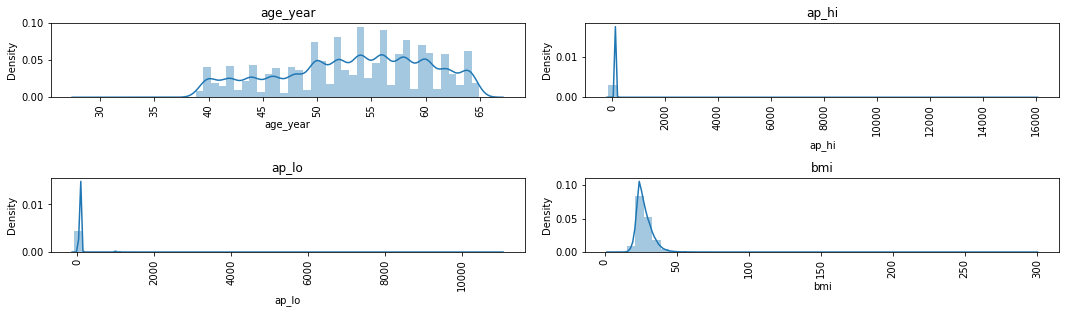

In [111]:
cols=['age_year', 'ap_hi','ap_lo',"bmi"]
rows=4
columns=2
iterator=1
for i in cols:
    plt.subplot(rows,columns,iterator)
    sns.distplot(df.loc[:,i],kde=True)
    plt.title(i)
    iterator=iterator+1
    plt.xticks(rotation=90)
    
plt.tight_layout()
plt.show()

### Inference:
- **age_year:** This columns are looking uniformly distributed with multiple modes. For this columns we can do **binning** to make them simple to understand. But at the same time both are giving same information, so we can treat age_days as unnecessary column and drop it.
- **height and weight:** This columns are looking nearly normally distributed.
- **ap_hi and ap_lo:** This columns have very low range and have some outliers. Thats why they are looking skewed.
In adults, blood pressure is considered to be normal under a systolic value of 140 mmHg and under a diastolic value of 90 mm

In [112]:
df["cholesterol"]=df["cholesterol"].replace(to_replace="well above normal",value="high")
df["cholesterol"]=df["cholesterol"].replace(to_replace="above normal",value="borderline high")


In [113]:
df.cholesterol.unique()

array(['normal', 'high', 'borderline high'], dtype=object)

In [114]:
df.head()

,age_year,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.391781,2,110,80,normal,normal,no,no,active,0,21.967120
1,55.419178,1,140,90,high,normal,no,no,active,1,34.927679
2,51.663014,1,130,70,high,normal,no,no,passive,1,23.507805
3,48.282192,2,150,100,normal,normal,no,no,active,1,28.710479
4,47.873973,1,100,60,normal,normal,no,no,passive,0,23.011177


### 2.Categorical Columns

In [115]:
df.select_dtypes(include=object).columns

Index(['cholesterol', 'gluc', 'smoke', 'alco', 'active'], dtype='object')

C:\Users\Nilesh Patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nilesh Patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nilesh Patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\N

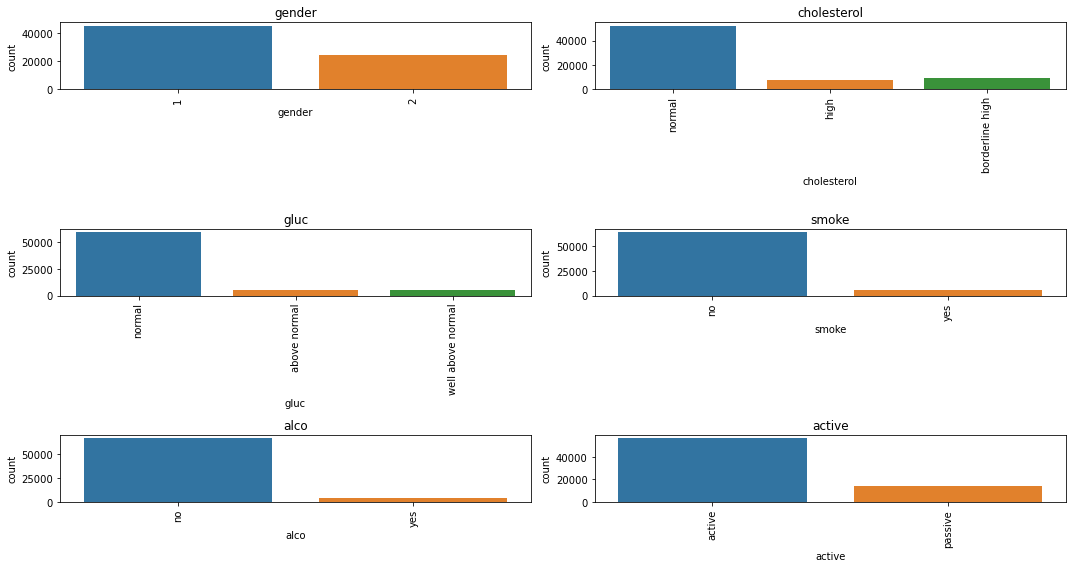

In [116]:
cols=['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
rows=3
columns=2
iterator=1
for i in cols:
    plt.subplot(rows,columns,iterator)
    sns.countplot(df.loc[:,i])
    plt.title(i)
    iterator=iterator+1
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()
    

### Inference:
- **gender:** The dataset is not balanced as per the gender and there are more females in the dataset than male.
- **cholesterol and gluc:** As we can see,most of the participants with cholesterol and glucose are of normal level than above normal amd well above normal.
- **smoke and alco:** Most of the participants are non smokers and non alcoholic.
- **active:** There are more participants with active life than passive.

In [117]:
df.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

## Multivariate analysis

In [118]:
X=df.corr()
X

,age_year,gender,ap_hi,ap_lo,cardio,bmi
age_year,1.000000,-0.022811,0.020764,0.017647,0.238159,0.085512
gender,-0.022811,1.000000,0.006005,0.015254,0.008109,-0.096529
ap_hi,0.020764,0.006005,1.000000,0.016086,0.054475,0.024852
ap_lo,0.017647,0.015254,0.016086,1.000000,0.065719,0.035345
cardio,0.238159,0.008109,0.054475,0.065719,1.000000,0.165632
bmi,0.085512,-0.096529,0.024852,0.035345,0.165632,1.000000


<AxesSubplot:>

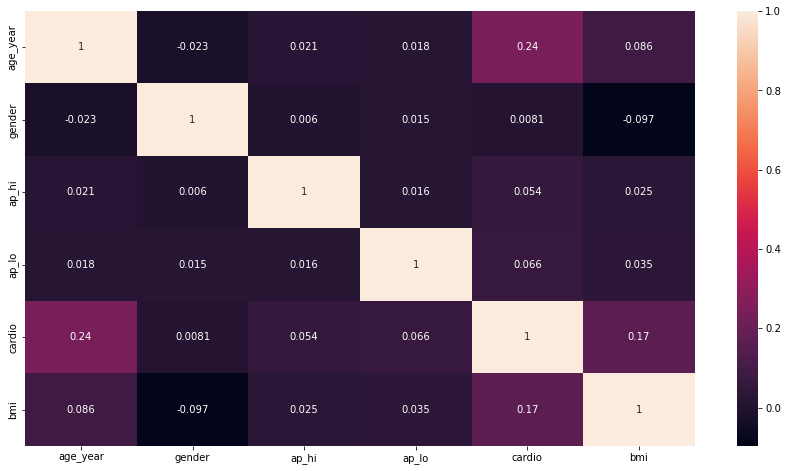

In [119]:
sns.heatmap(X,annot=True)

**Inference:** From above we can say that, cardio disease is more related with age_year, weight and cholesterol.


In [120]:
df.isnull().sum()[df.isnull().sum()!=0] #no missing values

Series([], dtype: int64)

# Bivariate Analysis of related columns

In [121]:
#Numerical columns

C:\Users\Nilesh Patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nilesh Patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nilesh Patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C

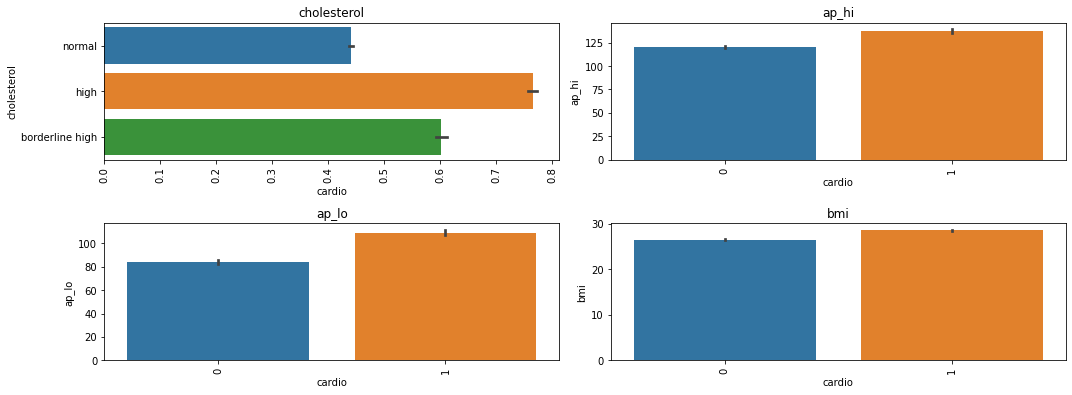

In [122]:
cols=["cholesterol","ap_hi","ap_lo","bmi"]
rows=3
columns=2
iterator=1
for i in cols:
    plt.subplot(rows,columns,iterator)
    sns.barplot(df.cardio,df.loc[:,i])
    plt.title(i)
    iterator=iterator+1
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [123]:
#categorical columns
x=pd.crosstab(index=df.cardio,columns=df.smoke)
x

smoke,no,yes
cardio,,
0,31781,3240
1,32050,2929


C:\Users\Nilesh Patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nilesh Patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nilesh Patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\N

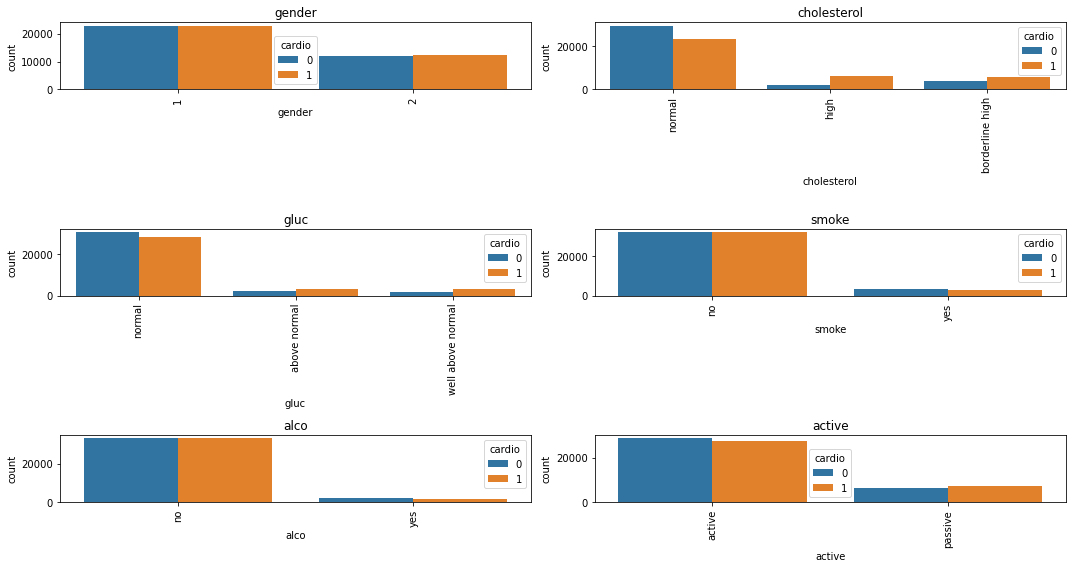

In [124]:
cols=['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
rows=3
columns=2
iterator=1
for i in cols:
    plt.subplot(rows,columns,iterator)
    sns.countplot(df.loc[:,i],hue=df.cardio)
    plt.title(i)
    iterator=iterator+1
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## Outlier Treatment

<AxesSubplot:>

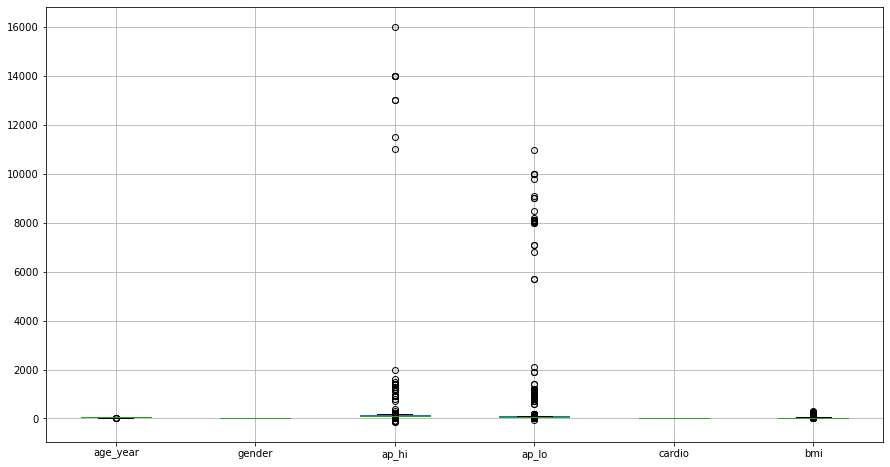

In [125]:
df.boxplot()

In [126]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

upperfense = Q3+3*IQR
lowerfense = Q1-3*IQR
print(upperfense)
print(lowerfense)

age_year     88.536986
gender        5.000000
ap_hi       200.000000
ap_lo       120.000000
cardio        4.000000
bmi          49.263545
dtype: float64
age_year    18.287671
gender      -2.000000
ap_hi       60.000000
ap_lo       50.000000
cardio      -3.000000
bmi          4.833792
dtype: float64


In [127]:
df=df[~((df>upperfense)|(df<lowerfense)).any(axis=1)]
df.shape

C:\Users\Nilesh Patil\AppData\Local\Temp\ipykernel_11040\2609896590.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df[~((df>upperfense)|(df<lowerfense)).any(axis=1)]


(68351, 11)

# Multivariate analysis

<AxesSubplot:>

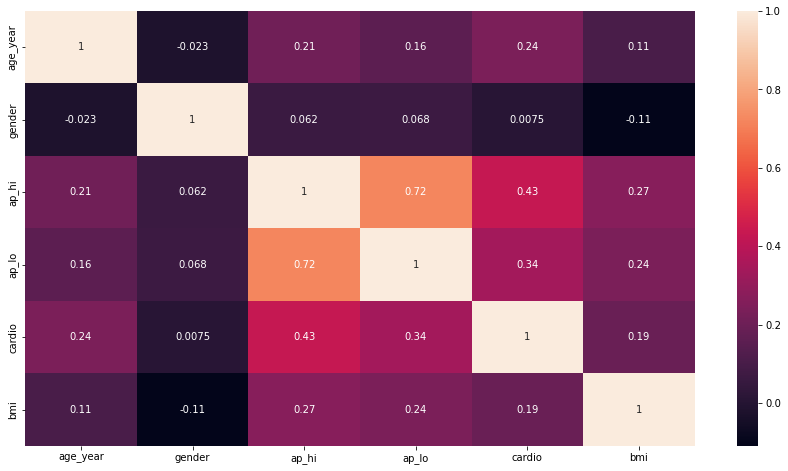

In [128]:
X=df.corr()
X
sns.heatmap(X,annot=True)

In [129]:
df.head()

,age_year,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.391781,2,110,80,normal,normal,no,no,active,0,21.967120
1,55.419178,1,140,90,high,normal,no,no,active,1,34.927679
2,51.663014,1,130,70,high,normal,no,no,passive,1,23.507805
3,48.282192,2,150,100,normal,normal,no,no,active,1,28.710479
4,47.873973,1,100,60,normal,normal,no,no,passive,0,23.011177


In [130]:
x=df.corr()
x

,age_year,gender,ap_hi,ap_lo,cardio,bmi
age_year,1.000000,-0.022943,0.210815,0.156176,0.239813,0.105195
gender,-0.022943,1.000000,0.062142,0.067638,0.007453,-0.109681
ap_hi,0.210815,0.062142,1.000000,0.719512,0.429958,0.268531
ap_lo,0.156176,0.067638,0.719512,1.000000,0.340254,0.240969
cardio,0.239813,0.007453,0.429958,0.340254,1.000000,0.191790
bmi,0.105195,-0.109681,0.268531,0.240969,0.191790,1.000000


<AxesSubplot:>

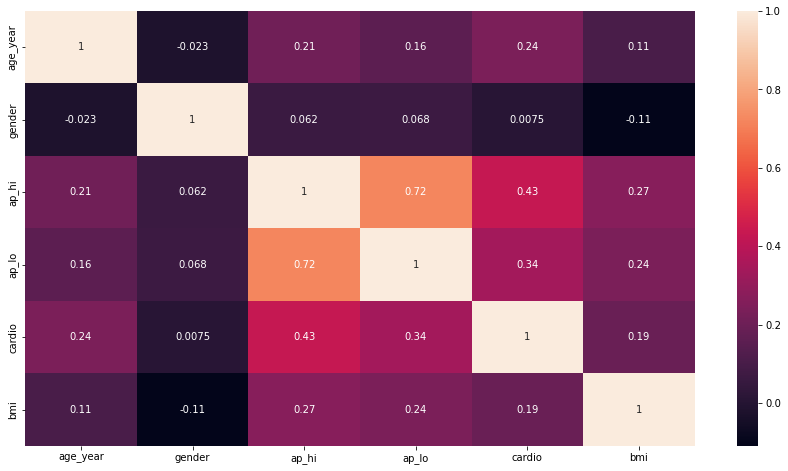

In [131]:
sns.heatmap(x,annot=True)

C:\Users\Nilesh Patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

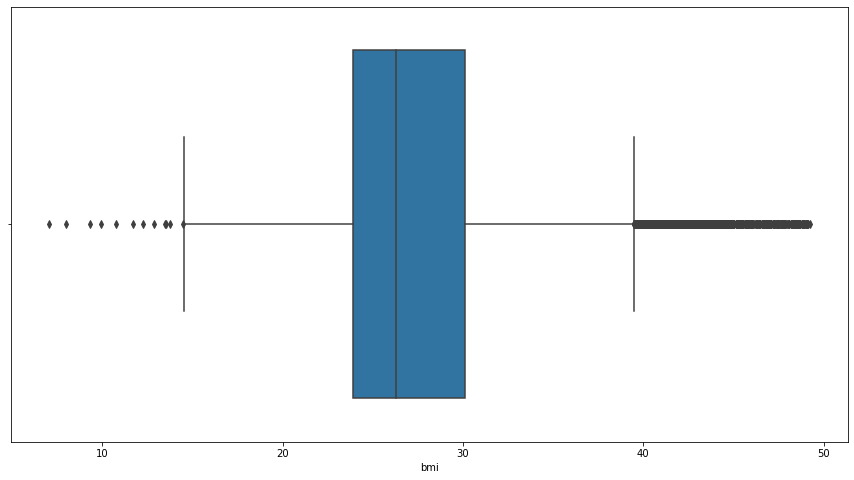

In [132]:
sns.boxplot(df.bmi)

In [133]:
df.cholesterol.unique()

array(['normal', 'high', 'borderline high'], dtype=object)

#  Encoding

In [134]:
df["cholesterol"]=df["cholesterol"].replace(to_replace="high",value=3)
df["cholesterol"]=df["cholesterol"].replace(to_replace="borderline high",value=2)
df["cholesterol"]=df["cholesterol"].replace(to_replace="normal",value=1)

In [135]:
df["gluc"]=df["gluc"].replace(to_replace="well above normal",value=3)
df["gluc"]=df["gluc"].replace(to_replace="above normal",value=2)
df["gluc"]=df["gluc"].replace(to_replace="normal",value=1)

In [136]:
df["smoke"]=df["smoke"].replace(to_replace="no",value=0)
df["smoke"]=df["smoke"].replace(to_replace="yes",value=1)


In [137]:
df["alco"]=df["alco"].replace(to_replace="no",value=0)
df["alco"]=df["alco"].replace(to_replace="yes",value=1)

In [138]:
df["active"]=df["active"].replace(to_replace="passive",value=0)
df["active"]=df["active"].replace(to_replace="active",value=1)


In [139]:
df["gender"]=df["gender"].replace(to_replace="Female",value=1)
df["gender"]=df["gender"].replace(to_replace="male",value=2)


In [98]:
#Power transformation - DOnt runn for binning
# df_num=df[["age_year","ap_hi","ap_lo","bmi"]]
from sklearn.preprocessing import OrdinalEncoder,PowerTransformer
PT=PowerTransformer()
df.loc[:,["age_year","ap_hi","ap_lo","bmi"]]=PT.fit_transform(pd.DataFrame(df.loc[:,["age_year","ap_hi","ap_lo","bmi"]]))

C:\Users\Nilesh Patil\AppData\Local\Temp\ipykernel_11040\3640689065.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,["age_year","ap_hi","ap_lo","bmi"]]=PT.fit_transform(pd.DataFrame(df.loc[:,["age_year","ap_hi","ap_lo","bmi"]]))


In [140]:
df.head()

,age_year,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.391781,2,110,80,1,1,0,0,1,0,21.967120
1,55.419178,1,140,90,3,1,0,0,1,1,34.927679
2,51.663014,1,130,70,3,1,0,0,0,1,23.507805
3,48.282192,2,150,100,1,1,0,0,1,1,28.710479
4,47.873973,1,100,60,1,1,0,0,0,0,23.011177


In [22]:
df.shape

(68351, 11)

# Splitting data 

In [23]:
X = df.drop("cardio",axis=1)
y = df["cardio"]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (47845, 10) (47845,)
Test set: (20506, 10) (20506,)


In [45]:
#scaling


# KNeighborsClassifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier
# K = 2 because of cardio (target value 0/1)
model = KNeighborsClassifier(n_neighbors=2).fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
### Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("KNeighborsClassifier")
print(cm)
print('Accurancy: {:.0f}%'.format(model.score(X_test, y_test)*100))

KNeighborsClassifier
[[8708 1705]
 [5636 4464]]
Accurancy: 64%


## knn+minmax

In [37]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
X_train_scaled=pd.DataFrame(min_max.fit_transform(X_train),columns=X_train.columns)
X_test_scaled=pd.DataFrame(min_max.transform(X_test),columns=X_test.columns)

In [38]:
knn_classification = KNeighborsClassifier(n_neighbors = 3)

# fit the model using fit() on train data
knn_model_1 = knn_classification.fit(X_train_scaled, y_train)

In [39]:
def get_test_report(model, test_data):
      test_pred = model.predict(test_data)
     
      return(classification_report(y_test, test_pred))

In [40]:
test_report=get_test_report(knn_model_1,X_test_scaled)
print(test_report)

              precision    recall  f1-score   support

           0       0.68      0.69      0.68     10372
           1       0.68      0.66      0.67     10134

    accuracy                           0.68     20506
   macro avg       0.68      0.68      0.68     20506
weighted avg       0.68      0.68      0.68     20506



## Tuning the knn model in the Data set where minmax scaling used

print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

In [41]:
knn_classification=KNeighborsClassifier(n_neighbors = 11,metric='euclidean')
knn_model_2 = knn_classification.fit(X_train_scaled, y_train)

In [42]:
test_report=get_test_report(knn_model_2,X_test_scaled)
print(test_report)

              precision    recall  f1-score   support

           0       0.71      0.75      0.73     10372
           1       0.73      0.69      0.71     10134

    accuracy                           0.72     20506
   macro avg       0.72      0.72      0.72     20506
weighted avg       0.72      0.72      0.72     20506



## Building Knn model on standard scaler applied Dataset

In [43]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train_std=pd.DataFrame(std.fit_transform(X_train),columns=X_train.columns)
X_test_std=pd.DataFrame(std.transform(X_test),columns=X_test.columns)

In [44]:
knn_classification = KNeighborsClassifier(n_neighbors = 3)

# fit the model using fit() on train data
knn_model_3 = knn_classification.fit(X_train_std, y_train)
test_report=get_test_report(knn_model_3,X_test_std)
print(test_report)

              precision    recall  f1-score   support

           0       0.68      0.69      0.68     10372
           1       0.68      0.67      0.67     10134

    accuracy                           0.68     20506
   macro avg       0.68      0.68      0.68     20506
weighted avg       0.68      0.68      0.68     20506



## Tuning the Knn model in the Data set where Standard scaling used

In [45]:
knn_classification=KNeighborsClassifier(n_neighbors = 15,metric='manhattan')
knn_model_4 = knn_classification.fit(X_train_std, y_train)


In [46]:
def get_test_report(model, test_data):
      test_pred = model.predict(test_data)
     
      return(classification_report(y_test, test_pred))
test_report=get_test_report(knn_model_4,X_test_std)
print(test_report)

              precision    recall  f1-score   support

           0       0.71      0.76      0.74     10372
           1       0.74      0.69      0.71     10134

    accuracy                           0.72     20506
   macro avg       0.73      0.72      0.72     20506
weighted avg       0.73      0.72      0.72     20506



# Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [48]:
### Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("NAive")
print(cm)
print('Accurancy: {:.0f}%'.format(classifier.score(X_test, y_test)*100))

NAive
[[8412 1960]
 [3808 6326]]
Accurancy: 72%


## Binning the data and trying Knn and Naive Bayes

In [141]:
df2=df.copy()

In [142]:
df2.head()

,age_year,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.391781,2,110,80,1,1,0,0,1,0,21.967120
1,55.419178,1,140,90,3,1,0,0,1,1,34.927679
2,51.663014,1,130,70,3,1,0,0,0,1,23.507805
3,48.282192,2,150,100,1,1,0,0,1,1,28.710479
4,47.873973,1,100,60,1,1,0,0,0,0,23.011177


In [143]:
# api_hi # systolic

# normal-0
# Prehypertension-1
# Hypertension-2

df2.loc[df2['ap_hi']<120,'ap_hi']=0
df2.loc[(df2['ap_hi']>=120)&(df2['ap_hi']<=139),'ap_hi']=1
df2.loc[df2['ap_hi']>=140,'ap_hi']=2


# ap_lo ## diastolic

# normal-0
# Prehypertension-1
# Hypertension-2

df2.loc[df2['ap_lo']<80,'ap_lo']=0
df2.loc[(df2['ap_lo']>=80)&(df2['ap_lo']<=89),'ap_lo']=1
df2.loc[df2['ap_lo']>=90,'ap_lo']=2


df2['bmi']=round(df2['bmi'],1)
## we round the values to 1 point after the decimal
# Bmi
# Underweight-0
# healthy-1
# overweight-2
# Obese-3
df2.loc[df2['bmi']<18.5,'bmi']=0
df2.loc[(df2['bmi']>=18.5)&(df2['bmi']<=24.9),'bmi']=1
df2.loc[(df2['bmi']>=25)&(df2['bmi']<=29.9),'bmi']=2
df2.loc[df2['bmi']>=30,'bmi']=3


##age year
# 15–47 years old (youth group)-0
# 48–63 years old (middle-aged group)-1
# ≥ 64 years old (elderly group)
df2.loc[(df2['age_year']>=15)&(df2['age_year']<47),'age_year']=0
df2.loc[(df2['age_year']>=47)&(df2['age_year']<64),'age_year']=1
df2.loc[df2['age_year']>=64,'age_year']=2


In [144]:
df2.head()

,age_year,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,1.0,2,0,1,1,1,0,0,1,0,1.0
1,1.0,1,2,2,3,1,0,0,1,1,3.0
2,1.0,1,1,0,3,1,0,0,0,1,1.0
3,1.0,2,2,2,1,1,0,0,1,1,2.0
4,1.0,1,0,0,1,1,0,0,0,0,1.0


In [145]:
X = df2.drop("cardio",axis=1)
y = df2["cardio"]

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (47845, 10) (47845,)
Test set: (20506, 10) (20506,)


## Naive Bayes after binning

In [147]:
gnb = GaussianNB()
gnb_model = gnb.fit(X_train, y_train)
test_report = get_test_report(gnb_model, test_data=X_test)
print(test_report)
## After binning we can see that naive bias has improved some

              precision    recall  f1-score   support

           0       0.69      0.80      0.74     10372
           1       0.76      0.63      0.69     10134

    accuracy                           0.72     20506
   macro avg       0.72      0.72      0.72     20506
weighted avg       0.72      0.72      0.72     20506



# Knn after binning(using min max scaler)

In [148]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
X_train_scaled=pd.DataFrame(min_max.fit_transform(X_train),columns=X_train.columns)
X_test_scaled=pd.DataFrame(min_max.transform(X_test),columns=X_test.columns)

In [149]:
knn_classification = KNeighborsClassifier(n_neighbors = 3)

# fit the model using fit() on train data
knn_model_3 = knn_classification.fit(X_train_scaled, y_train)
test_report=get_test_report(knn_model_3,X_test_scaled)
print(test_report)

              precision    recall  f1-score   support

           0       0.65      0.75      0.70     10372
           1       0.70      0.59      0.64     10134

    accuracy                           0.67     20506
   macro avg       0.67      0.67      0.67     20506
weighted avg       0.67      0.67      0.67     20506



## knn after binning(using std scaler)

In [150]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train_std=pd.DataFrame(std.fit_transform(X_train),columns=X_train.columns)
X_test_std=pd.DataFrame(std.transform(X_test),columns=X_test.columns)
X_train_std.head(3)

,age_year,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
0,0.375815,1.364697,-0.123174,-0.112606,0.938073,-0.393481,-0.310737,-0.239913,0.496438,0.149808
1,0.375815,-0.732763,-0.123174,-0.112606,-0.535936,-0.393481,-0.310737,-0.239913,0.496438,1.393527
2,0.375815,-0.732763,1.370682,1.332193,-0.535936,-0.393481,-0.310737,-0.239913,0.496438,0.149808


In [151]:
knn_classification = KNeighborsClassifier(n_neighbors = 3)

# fit the model using fit() on train data
knn_model_3 = knn_classification.fit(X_train_std, y_train)
test_report=get_test_report(knn_model_3,X_test_std)
print(test_report)
## here we can see that metrix values improved and hence we can tune it 

              precision    recall  f1-score   support

           0       0.65      0.74      0.69     10372
           1       0.69      0.59      0.64     10134

    accuracy                           0.67     20506
   macro avg       0.67      0.66      0.66     20506
weighted avg       0.67      0.67      0.66     20506



In [153]:
knn_classification=KNeighborsClassifier(n_neighbors = 9,metric='manhattan')
knn_model_4 = knn_classification.fit(X_train_std, y_train)

In [154]:
def get_test_report(model, test_data):
      test_pred = model.predict(test_data)
     
      return(classification_report(y_test, test_pred))
test_report=get_test_report(knn_model_4,X_test_std)
print(test_report)

              precision    recall  f1-score   support

           0       0.69      0.72      0.70     10372
           1       0.70      0.66      0.68     10134

    accuracy                           0.69     20506
   macro avg       0.69      0.69      0.69     20506
weighted avg       0.69      0.69      0.69     20506



# DecisionTree

In [107]:
X = df.drop("cardio",axis=1)
y = df["cardio"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (47863, 12) (47863,)
Test set: (20513, 12) (20513,)


In [108]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
model_tree.fit(X_train, y_train)
y_pred = model_tree.predict(X_test)

In [109]:
cm = confusion_matrix(y_test, y_pred)
print("DecisionTree")
print(cm)
print('Accurancy: {:.0f}%'.format(model_tree.score(X_test, y_test)*100))

DecisionTree
[[8187 2226]
 [3339 6761]]
Accurancy: 73%


In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75     10413
           1       0.75      0.67      0.71     10100

    accuracy                           0.73     20513
   macro avg       0.73      0.73      0.73     20513
weighted avg       0.73      0.73      0.73     20513



## Decision Tree tuning

In [31]:
dt_tuned=DecisionTreeClassifier(criterion="gini",max_depth=8,max_features="sqrt",min_samples_split=6,min_samples_leaf=2)
dt_tuned.fit(X_train,y_train)
y_pred=dt_tuned.predict(X_test)
print("Classification report-test:")
print(classification_report(y_test,y_pred))

Classification report-test:
              precision    recall  f1-score   support

           0       0.70      0.79      0.74     10372
           1       0.76      0.65      0.70     10134

    accuracy                           0.72     20506
   macro avg       0.73      0.72      0.72     20506
weighted avg       0.73      0.72      0.72     20506



In [27]:
dt_tuned=DecisionTreeClassifier(criterion="gini",max_depth=8,max_features="sqrt",min_samples_split=6,min_samples_leaf=2)
dt_tuned.fit(X_train,y_train)
y_pred=dt_tuned.predict(X_train)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.75      0.74     24243
           1       0.73      0.70      0.72     23602

    accuracy                           0.73     47845
   macro avg       0.73      0.73      0.73     47845
weighted avg       0.73      0.73      0.73     47845



# RandomForestClassifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test).round(0)

In [54]:
cm = confusion_matrix(y_test, y_pred)
print("DecisionTree")
print(cm)
print('Accurancy: {:.0f}%'.format(model_rf.score(X_test, y_test)*100))

DecisionTree
[[7650 2763]
 [3088 7012]]
Accurancy: 71%


# Another way - need to complete

In [55]:
def metrics(y_test,y_pred,model_name):
    print("The metrics for the model",model_name)
    print('')
    print("Accuracy score:",accuracy_score(y_test,y_pred))
    print('')
        

    print("recall score:",recall_score(y_test,y_pred))
    print('')

    print("precision score:",precision_score(y_test,y_pred))
    print('')

    print("f1 score:",f1_score(y_test,y_pred))
    print('')

    print("roc auc score:",roc_auc_score(y_test,y_pred))
    
    print("Classification Report")
    print(classification_report(y_test,y_pred))

In [56]:
def plot_metrics(clf,x_test,y_test):
    plot_confusion_matrix(clf,x_test,y_test,display_labels=[0,1])
    plot_roc_curve(clf,x_test,y_test)
    plot_precision_recall_curve(clf,x_test,y_test)

In [57]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
metrics(y_test,y_pred,"KNN")

The metrics for the model KNN

Accuracy score: 0.6949739189782089

recall score: 0.6685148514851486

precision score: 0.6988924541972881

f1 score: 0.6833662264055462

roc auc score: 0.6945762579715189
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.72      0.71     10413
           1       0.70      0.67      0.68     10100

    accuracy                           0.69     20513
   macro avg       0.70      0.69      0.69     20513
weighted avg       0.70      0.69      0.69     20513



#plot model complexity score
neighbors=np.arange(1,20)
train=np.empty(len(neighbors))
test=np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(k)
    knn.fit(X_train,y_train)
    train[i]=knn.score(X_train,y_train)
    test[i]=knn.score(X_test,y_test)
    
plt.title("KNN model complete plots")
plt.plot(neighbors,train,label="Train Accuracies")
plt.plot(neighbors,test,label="Test Accuracies")
plt.legend()
plt.xlabel("K values")
plt.ylabel("Accuracy score")
plt.show()

In [58]:
# fit a random forest model and optimize
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
metrics(y_test,y_pred,"RFC")

The metrics for the model RFC

Accuracy score: 0.7146687466484668

recall score: 0.6976237623762376

precision score: 0.7156932453021838

f1 score: 0.7065429932313863

roc auc score: 0.7144125726315068
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.73      0.72     10413
           1       0.72      0.70      0.71     10100

    accuracy                           0.71     20513
   macro avg       0.71      0.71      0.71     20513
weighted avg       0.71      0.71      0.71     20513



plot_metrics(rfc,X_test,y_test)

In [1]:
clfs={
    "Logreg":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Naive Beyes":GaussianNB(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Ada boost":AdaBoostClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "xgboost":XGBClassifier()
}
models_report=pd.DataFrame(columns=["model","accuracy","recall","precision","roc auc","f1 score"])


for clf,clf_name in list(zip(clfs.values(),clfs.keys())):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print("Fitting the model...",clf_name)
    t={
        "model name":clf_name,
        "accuracy":accuracy_score(y_test,y_pred),
        "recall":recall_score(y_test,y_pred),
        "precision":precision_score(y_test,y_pred),
        "roc auc":roc_auc_score(y_test,y_pred),
        "f1 score":f1_score(y_test,y_pred)
    }
    models_report=models_report.append(t,ignore_index=True)
models_report=models_report.sort_values(by="f1 score",ascending=False)
models_report

NameError: name 'LogisticRegression' is not defined

# RFC Tuning

In [61]:
cv.best_score_

0.7240666152627434

In [62]:
cv.best_params_

{'criterion': 'gini',
 'max_features': 'log2',
 'min_samples_split': 8,
 'n_estimators': 200}

In [ ]:
cv.best_estimator_

In [64]:
rfc_tuned=RandomForestClassifier(n_estimators=200,criterion="gini",max_features="sqrt",min_samples_split=8)
rfc_tuned.fit(X_train,y_train)
y_pred=rfc_tuned.predict(X_test)
metrics(y_test,y_pred,"RFC")

The metrics for the model RFC

Accuracy score: 0.7270023887290986

recall score: 0.6988118811881188

precision score: 0.7339850249584027

f1 score: 0.7159667275309393

roc auc score: 0.7265787054072737
Classification Report
              precision    recall  f1-score   support

           0       0.72      0.75      0.74     10413
           1       0.73      0.70      0.72     10100

    accuracy                           0.73     20513
   macro avg       0.73      0.73      0.73     20513
weighted avg       0.73      0.73      0.73     20513



In [65]:
sc=StandardScaler()
x_std=sc.fit_transform(X_train)

In [66]:
from sklearn.model_selection import cross_val_score,KFold

In [ ]:
GS.best_params_

# Logistic Regression

In [68]:
import statsmodels
import statsmodels.api as sm

In [69]:
log=LogisticRegression()
x=sm.add_constant(X_train)
logreg=sm.Logit(y_train,x).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.560386
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 cardio   No. Observations:                47863
Model:                          Logit   Df Residuals:                    47850
Method:                           MLE   Df Model:                           12
Date:                Tue, 24 Jan 2023   Pseudo R-squ.:                  0.1915
Time:                        13:14:18   Log-Likelihood:                -26822.
converged:                       True   LL-Null:                       -33173.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -10.7203      1.255     -8.542      0.000     -13.180      -8.261
age_year        0.0516      0.002     31.716      0.000       0.048       0.055
gender         -0.0211      0.027     -0.791      0.429      -0.073       0.031
height         -0.0075      0.008     -0.984      0.325      -0.022       0.007
weight          0.0148      0.008      1.783      0.075      -0.001       0.031
ap_hi           0.0553      0.001     50.273      0.000       0.053       0.057
ap_lo           0.0130      0.002      7.484      0.000       0.010       0.016
cholesterol     0.5170      0.019     27.416      0.000       0.480       0.554
gluc           -0.1234      0.021     -5.798      0.000      -0.165      -0.082
smoke          -0.1395      0.042     -3.333      0.001      -0.221      -0.057
alco           -0.1900      0.051     -3.737      0.000      -0.290      -0.090
active         -0.2144      0.026     -8.144      0.000      -0.266      -0.163
bmi            -0.0091      0.022     -0.413      0.679      -0.052       0.034
===============================================================================
"""

In [70]:
X_test=sm.add_constant(X_test)
y_pred_prob = logreg.predict(X_test)



In [71]:
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [72]:
acc_table = classification_report(y_test, y_pred)
print(acc_table)

              precision    recall  f1-score   support

           0       0.71      0.79      0.75     10413
           1       0.76      0.67      0.71     10100

    accuracy                           0.73     20513
   macro avg       0.73      0.73      0.73     20513
weighted avg       0.73      0.73      0.73     20513



In [ ]:
print

In [73]:
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for model comparision are 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score',
# 'Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model, cutoff):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = logreg.predict(X_test)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : roc_auc_score(y_test, y_pred_prob),   #pass probability
                                    'Precision Score': precision_score(y_test, y_pred),
                                    'Recall Score': recall_score(y_test, y_pred),
                                    'Accuracy Score': accuracy_score(y_test, y_pred),
                                    'Kappa Score':cohen_kappa_score(y_test, y_pred),
                                    'f1-score': f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

In [74]:
cutoff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# use the for loop to compute performance measures for each value of the cut-off
# call the update_score_card() to update the score card for each cut-off
# pass the model and cut-off value to the function
for value in cutoff:
    update_score_card(logreg, value)

C:\Users\Nilesh Patil\AppData\Local\Temp\ipykernel_1348\2027473632.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Probability Cutoff': cutoff,
C:\Users\Nilesh Patil\AppData\Local\Temp\ipykernel_1348\2027473632.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Probability Cutoff': cutoff,
C:\Users\Nilesh Patil\AppData\Local\Temp\ipykernel_1348\2027473632.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Probability Cutoff': cutoff,
C:\Users\Nilesh Patil\AppData\Local\Temp\ipykernel_1348\2027473632.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

In [75]:
print('Score Card for Logistic regression:')
score_card = score_card.sort_values('Probability Cutoff').reset_index(drop = True)
score_card.style.highlight_max(color = 'lightblue', subset = ['AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score'])

Score Card for Logistic regression:


,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.100000,0.792205,0.502781,0.993366,0.513041,0.039933,0.667643
1,0.200000,0.792205,0.535738,0.969208,0.571296,0.152696,0.690047
2,0.300000,0.792205,0.594179,0.907624,0.649296,0.303946,0.718192
3,0.400000,0.792205,0.677042,0.796832,0.712816,0.427022,0.732069
4,0.500000,0.792205,0.755011,0.671287,0.730902,0.460781,0.710692
5,0.600000,0.792205,0.802199,0.556139,0.713938,0.425091,0.656882
6,0.700000,0.792205,0.830512,0.422574,0.673232,0.341449,0.560142
7,0.800000,0.792205,0.845017,0.266139,0.614635,0.221070,0.404789
8,0.900000,0.792205,0.852964,0.106832,0.551163,0.090155,0.189881


## Youden's index

In [76]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob) 


In [77]:
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)
youdens_table.head(1) #first value will give best value

,TPR,FPR,Threshold,Difference
0,0.693366,0.230385,0.480969,0.462981


In [78]:
y_pred_youden = [ 0 if x < 0.48 else 1 for x in y_pred_prob]

In [79]:
cm = confusion_matrix(y_test, y_pred_youden)
cm

array([[7999, 2414],
       [3093, 7007]], dtype=int64)

In [80]:
acc_table = classification_report(y_test, y_pred_youden)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.72      0.77      0.74     10413
           1       0.74      0.69      0.72     10100

    accuracy                           0.73     20513
   macro avg       0.73      0.73      0.73     20513
weighted avg       0.73      0.73      0.73     20513



In [81]:
print('kappa value:',cohen_kappa_score(y_test, y_pred_youden))

kappa value: 0.4624039796531171


In [82]:
#RFE
from sklearn.feature_selection import RFE

In [83]:
X_train.head()

,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
10853,62.476712,2,163,64.0,120,80,1,1,0,0,1,24.088223
32275,39.600000,2,173,73.0,110,80,2,2,0,0,1,24.391059
49431,60.249315,2,170,64.0,160,90,1,1,0,0,0,22.145329
48096,50.123288,2,171,92.0,110,70,1,3,1,0,1,31.462672
56361,63.882192,2,165,85.0,120,80,1,1,0,0,0,31.221304


In [84]:
logreg = LogisticRegression()
rfe_model = RFE(estimator = logreg, n_features_to_select = 3)

# fit the RFE model on the train dataset using fit()
rfe_model = rfe_model.fit(X_train, y_train)
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)
signi_feat_rfe = feat_index[feat_index==1].index
print(signi_feat_rfe)

C:\Users\Nilesh Patil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nilesh Patil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

Index(['cholesterol', 'smoke', 'active'], dtype='object')


In [85]:
X=X_train[['cholesterol', 'smoke', 'active']]
X=sm.add_constant(X)
logreg_rfe = sm.Logit(y_train,X ).fit()
print(logreg_rfe.summary())

Optimization terminated successfully.
         Current function value: 0.666187
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 cardio   No. Observations:                47863
Model:                          Logit   Df Residuals:                    47859
Method:                           MLE   Df Model:                            3
Date:                Tue, 24 Jan 2023   Pseudo R-squ.:                 0.03880
Time:                        13:14:29   Log-Likelihood:                -31886.
converged:                       True   LL-Null:                       -33173.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.8126      0.029    -28.196      0.000      -0.869      -0.756
cholesterol     0.7130    

In [86]:
x_t=X_test[['cholesterol', 'smoke', 'active']]
X_t=sm.add_constant(x_t)
y_pred_prob_rfe = logreg_rfe.predict(X_t)

# print the y_pred_prob_rfe
y_pred_prob_rfe.head()

30334    0.426546
36914    0.426546
58824    0.426546
63213    0.426546
34787    0.475127
dtype: float64

In [87]:
y_pred_rfe = [ 0 if x < 0.48 else 1 for x in y_pred_prob_rfe]

In [88]:
y_pred_rfe[0:5]

[0, 0, 0, 0, 0]

In [89]:
print(classification_report(y_test, y_pred_rfe))

              precision    recall  f1-score   support

           0       0.57      0.84      0.68     10413
           1       0.67      0.34      0.45     10100

    accuracy                           0.59     20513
   macro avg       0.62      0.59      0.56     20513
weighted avg       0.62      0.59      0.56     20513



In [90]:
print('kappa value:',cohen_kappa_score(y_test, y_pred_youden))

kappa value: 0.4624039796531171


In [92]:
LR=LogisticRegression()

In [94]:
GS.best_params_

{'n_estimators': 41}

In [95]:
GS.best_estimator_

AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=41,
                   random_state=0)

In [96]:
GS.best_score_

0.7232501213493049

AB_LR=AdaBoostClassifier(base_estimator=LR,n_estimators=41,random_state=0)

score=cross_val_score(AB_LR,X_train,y_train,cv=kf,scoring='f1_weighted')
print(classification_report(score))

# XGBoost

In [33]:
xg=XGBClassifier()
xg.fit(X_train,y_train)
y_pred=xg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75     10372
           1       0.75      0.69      0.72     10134

    accuracy                           0.73     20506
   macro avg       0.74      0.73      0.73     20506
weighted avg       0.74      0.73      0.73     20506



In [34]:
xg=XGBClassifier()
xg.fit(X_train,y_train)
y_pred=xg.predict(X_train)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78     24243
           1       0.79      0.73      0.75     23602

    accuracy                           0.77     47845
   macro avg       0.77      0.77      0.77     47845
weighted avg       0.77      0.77      0.77     47845



In [35]:
xg_tuned=XGBClassifier(max_depth = 3, gamma = 0,n_estimators=1,learning_rate=0.1)
xg.fit(X_train,y_train)
y_pred=xg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75     10372
           1       0.75      0.69      0.72     10134

    accuracy                           0.73     20506
   macro avg       0.74      0.73      0.73     20506
weighted avg       0.74      0.73      0.73     20506



In [36]:
xg_tuned=XGBClassifier(max_depth = 3, gamma = 0,n_estimators=1,learning_rate=0.1)
xg.fit(X_train,y_train)
y_pred=xg.predict(X_train)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78     24243
           1       0.79      0.73      0.75     23602

    accuracy                           0.77     47845
   macro avg       0.77      0.77      0.77     47845
weighted avg       0.77      0.77      0.77     47845

